In [78]:
# Run some setup code for this notebook.

import matplotlib.pyplot as plt


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Dataset

In [79]:
import pandas as pd
import numpy as np
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [81]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [82]:
################################################################################
# TODO:                                                                        #
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value #
################################################################################

# use mean value to deal with NULL rows with number
num_cols = df.select_dtypes(include = np.number).columns.tolist()
for col in num_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
# appear some problem, so i decide all to use mode    

# use  mode to deal with NULL rows with string
cat_cols = df.select_dtypes(exclude = np.number).columns.tolist()
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()
# df.head(20)

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Encode 

In [83]:
################################################################################
# TODO:                                                                        #
# Task2 deal with categorical features
# Tip use pd.get_dummies. 
################################################################################

df = pd.get_dummies(df, columns=['Gender', 'Married','Education', 'Self_Employed', 'Loan_Status'])
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 'Self_Employed_No', 'Loan_Status_N'], axis=1)
df.Property_Area = df.Property_Area.map({'Urban': 1.0, 'Semiurban': 0.5, 'Rural': 0.0})
df.Dependents = df.Dependents.map({'0': 0.0, '1': 1.0, '2': 2.0, '3+': 3.0})
df = df.rename(columns={'Gender_Male': 'Gender'})
df = df.rename(columns={'Married_Yes': 'Married'})
df = df.rename(columns={'Education_Graduate': 'Education'})
df = df.rename(columns={'Self_Employed_Yes': 'Self_Employed'})
df = df.rename(columns={'Loan_Status_Y': 'Loan_Status'})
df.head(10)

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender,Married,Education,Self_Employed,Loan_Status
0,0.0,5849,0.0,120.0,360.0,1.0,1.0,True,False,True,False,True
1,1.0,4583,1508.0,128.0,360.0,1.0,0.0,True,True,True,False,False
2,0.0,3000,0.0,66.0,360.0,1.0,1.0,True,True,True,True,True
3,0.0,2583,2358.0,120.0,360.0,1.0,1.0,True,True,False,False,True
4,0.0,6000,0.0,141.0,360.0,1.0,1.0,True,False,True,False,True
5,2.0,5417,4196.0,267.0,360.0,1.0,1.0,True,True,True,True,True
6,0.0,2333,1516.0,95.0,360.0,1.0,1.0,True,True,False,False,True
7,3.0,3036,2504.0,158.0,360.0,0.0,0.5,True,True,True,False,False
8,2.0,4006,1526.0,168.0,360.0,1.0,1.0,True,True,True,False,True
9,1.0,12841,10968.0,349.0,360.0,1.0,0.5,True,True,True,False,False


## Data process

In [84]:

################################################################################
# TODO:                                                                        #
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization
################################################################################
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# change to [0,1]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

for column in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
    X[column] = (X[column] - X[column].mean()) / X[column].std()
    
X['Credit_History'] = X['Credit_History'] * 10

X.head()

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################np.random.seed(0)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender,Married,Education,Self_Employed
0,0.0,0.072931,-0.554036,-0.302513,0.273009,10.0,1.0,True,False,True,False
1,1.0,-0.134302,-0.038700,-0.207479,0.273009,10.0,0.0,True,True,True,False
2,0.0,-0.393427,-0.554036,-0.943988,0.273009,10.0,1.0,True,True,True,True
3,0.0,-0.461686,0.251774,-0.302513,0.273009,10.0,1.0,True,True,False,False
4,0.0,0.097649,-0.554036,-0.053050,0.273009,10.0,1.0,True,False,True,False


In [85]:
np.random.seed(1)
indices = np.arange(len(X))
np.random.shuffle(indices)
split = int(len(X) * 0.9)
# train : test = 9 : 1
train_index = indices[:split]
test_index = indices[split:]
X_train, y_train = X.iloc[train_index], y.iloc[train_index]
X_test, y_test = X.iloc[test_index], y.iloc[test_index]
#X_train = X_train.values
#X_test = X_test.values
#y_train = y_train.values
#y_test = y_test.values
# print(X_train)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((552, 11), (552, 1), (62, 11), (62, 1))

## Train

In [86]:
from Logistic import LogisticRegression
import matplotlib.pyplot as plt

################################################################################
# TODO:                                                                        #
# Task4 train your model and plot the loss curve of training
# You need to complete the Logistic.py file
# model = LogisticRegression()
################################################################################
# X_train = np.matrix(X_train.values)
# y_train = np.matrix(y_train.values)
classifier = LogisticRegression(penalty = "l2", gamma = 1)
losses = classifier.fit(X_train, y_train, lr = 0.01)
len(losses)

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

303

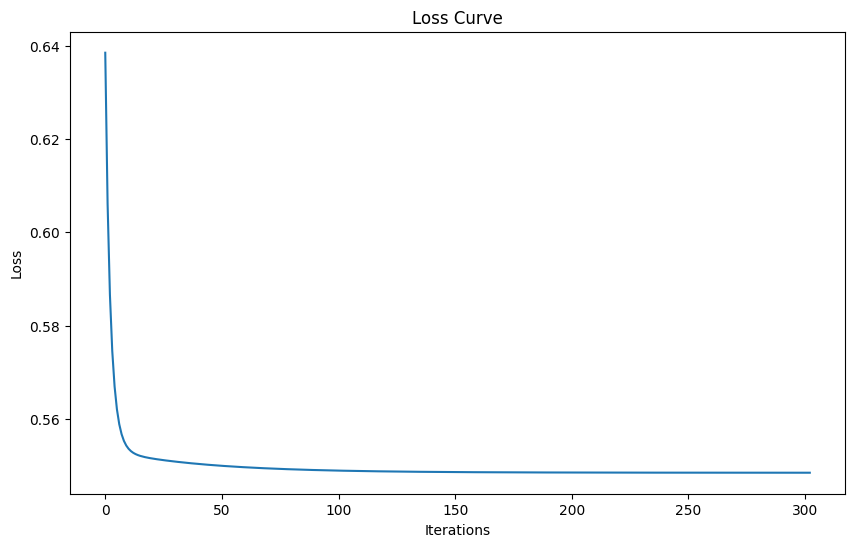

In [87]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.arange(len(losses)), losses)
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_title('Loss Curve')
plt.show()

## Test

In [88]:
################################################################################
# TODO:                                                                        #
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
################################################################################

predicts = classifier.predict(np.matrix(X_test.values))
predicts = predicts.T.tolist()
actuals = y_test.T.values.tolist()[0]

predicts = np.array(predicts)  
actuals = np.array(actuals)    

accuracy = np.mean((predicts > 0.5) == actuals)

print(f"accuracy = {accuracy}")
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

accuracy = 0.8387096774193549


In [89]:

classifier = LogisticRegression(penalty="l2" ,gamma=1)
losses = classifier.fit(X_train, y_train, lr=0.001)

predicts = classifier.predict(np.matrix(X_test.values))
predicts = predicts.T.tolist()
actuals = y_test.T.values.tolist()[0]

predicts = np.array(predicts)  
actuals = np.array(actuals)    

accuracy = np.mean((predicts > 0.5) == actuals)

print(f"accuracy = {accuracy}", f"lr = 0.001")
len(losses)


accuracy = 0.8387096774193549 lr = 0.001


2030

In [90]:

classifier = LogisticRegression(penalty="l2" ,gamma=1)
losses = classifier.fit(X_train, y_train, lr=0.0001)

predicts = classifier.predict(np.matrix(X_test.values))
predicts = predicts.T.tolist()
actuals = y_test.T.values.tolist()[0]

predicts = np.array(predicts)  
actuals = np.array(actuals)    

accuracy = np.mean((predicts > 0.5) == actuals)

print(f"accuracy = {accuracy}", f"lr = 0.0001")
len(losses)

accuracy = 0.8387096774193549 lr = 0.0001


10425

In [91]:
classifier = LogisticRegression(penalty="l2" ,gamma = 1)
losses = classifier.fit(X_train, y_train, lr=0.1)

predicts = classifier.predict(np.matrix(X_test.values))
predicts = predicts.T.tolist()
actuals = y_test.T.values.tolist()[0]

predicts = np.array(predicts)  
actuals = np.array(actuals)    

accuracy = np.mean((predicts > 0.5) == actuals)

print(f"accuracy = {accuracy}", f"lr = 0.1")
len(losses)

accuracy = 0.8387096774193549 lr = 0.1


40

In [92]:
classifier = LogisticRegression(penalty="l2" ,gamma = 1)
losses = classifier.fit(X_train, y_train, lr =  0.05)

predicts = classifier.predict(np.matrix(X_test.values))
predicts = predicts.T.tolist()
actuals = y_test.T.values.tolist()[0]

predicts = np.array(predicts)  
actuals = np.array(actuals)    

accuracy = np.mean((predicts > 0.5) == actuals)

print(f"accuracy = {accuracy}", f"lr = 0.05")
len(losses)

accuracy = 0.8387096774193549 lr = 0.05


74

In [93]:
classifier = LogisticRegression(penalty="l2" ,gamma = 1)
losses = classifier.fit(X_train, y_train, lr =  0.08)

predicts = classifier.predict(np.matrix(X_test.values))
predicts = predicts.T.tolist()
actuals = y_test.T.values.tolist()[0]

predicts = np.array(predicts)  
actuals = np.array(actuals)    

accuracy = np.mean((predicts > 0.5) == actuals)

print(f"accuracy = {accuracy}", f"lr = 0.08")
len(losses)

accuracy = 0.8387096774193549 lr = 0.08


48

In [94]:
classifier = LogisticRegression(penalty="l2" ,gamma = 4)
losses = classifier.fit(X_train, y_train, lr=0.01)

predicts = classifier.predict(np.matrix(X_test.values))
predicts = predicts.T.tolist()
actuals = y_test.T.values.tolist()[0]

predicts = np.array(predicts)  
actuals = np.array(actuals)    

accuracy = np.mean((predicts > 0.5) == actuals)

print(f"accuracy = {accuracy}", f"gama = 4")
len(losses)

accuracy = 0.7903225806451613 gama = 4


84

In [95]:
classifier = LogisticRegression(penalty="l2" ,gamma = 2)
losses = classifier.fit(X_train, y_train, lr=0.01)

predicts = classifier.predict(np.matrix(X_test.values))
predicts = predicts.T.tolist()
actuals = y_test.T.values.tolist()[0]

predicts = np.array(predicts)  
actuals = np.array(actuals)    

accuracy = np.mean((predicts > 0.5) == actuals)

print(f"accuracy = {accuracy}", f"gama = 2")
len(losses)

accuracy = 0.8387096774193549 gama = 2


162

In [96]:
classifier = LogisticRegression(penalty="l1" ,gamma=1)
losses = classifier.fit(X_train, y_train, lr=0.01)

predicts = classifier.predict(np.matrix(X_test.values))
predicts = predicts.T.tolist()
actuals = y_test.T.values.tolist()[0]

predicts = np.array(predicts)  
actuals = np.array(actuals)    

accuracy = np.mean((predicts > 0.5) == actuals)

print(f"accuracy = {accuracy}", f"penalty = l1")
len(losses)

accuracy = 0.8225806451612904 penalty = l1


6218

In [97]:
classifier = LogisticRegression(penalty="l1" ,gamma=0.5)
losses = classifier.fit(X_train, y_train, lr=0.01)

predicts = classifier.predict(np.matrix(X_test.values))
predicts = predicts.T.tolist()
actuals = y_test.T.values.tolist()[0]

predicts = np.array(predicts)  
actuals = np.array(actuals)    

accuracy = np.mean((predicts > 0.5) == actuals)

print(f"accuracy = {accuracy}", f"penalty = l1")
len(losses)

accuracy = 0.8387096774193549 penalty = l1


97